<a href="https://colab.research.google.com/github/Nikshit-Vora/Data-Analysis---Petroleum-Tech./blob/main/J_function_Capillary_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

J function = 0.21645*(pc/sigma)*((k/phi)**0.5)
                                                                                 
pc    = capillary pressure (psi)                 
      sigma = interfacial tension (dyne/cm)                                    
      k     = permeability (md)                                                
      phi   = porosity (fraction)  

In [2]:
# intially graph is plotted between laboratory capillary pressure and water saturation

# Data

sw     = [1,0.8,0.6,0.4,0.25,0.23,0.21,0.20]
Pc_lab = [0.5,0.6,0.75,1.05,1.50,1.75,3.0,8.0]

In [4]:
tbl_data = pd.DataFrame({'sw':sw,'CP_lab':Pc_lab})
tbl_data

,sw,CP_lab
0,1.00,0.50
1,0.80,0.60
2,0.60,0.75
3,0.40,1.05
4,0.25,1.50
5,0.23,1.75
6,0.21,3.00
7,0.20,8.00


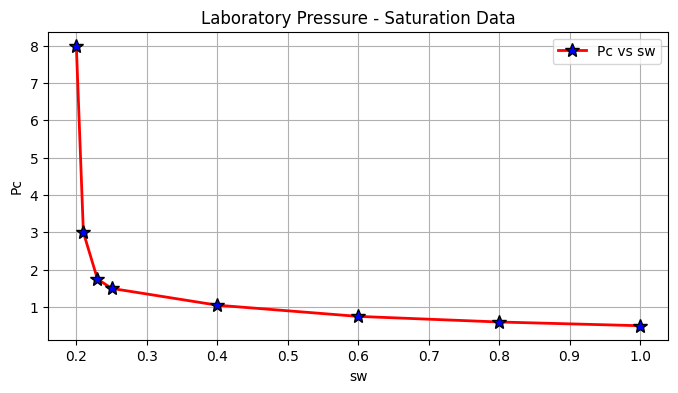

In [20]:
plt.style.use("default")
plt.figure(figsize=(8,4))

plt.plot(sw,Pc_lab, label="Pc vs sw", color='Red', linewidth=2, marker='*',ms=10, mec="black", mfc='Blue')

plt.xlabel("sw")
plt.ylabel("Pc")
plt.title("Laboratory Pressure - Saturation Data")
plt.legend()
plt.grid()

plt.show()

now we will calculate the j function

In [48]:
# constant parameter

sigma_lab = 50 
k_lab = 80
phi_lab = 0.16

In [49]:
J = 0.21645*(tbl_data['CP_lab']/sigma_lab)*((k_lab/phi_lab)**0.5)

In [50]:
New_tbl={'sw':sw, 'lab_Pressure':Pc_lab,"J_fun":J}

In [51]:
pd.DataFrame(New_tbl)

,sw,lab_Pressure,J_fun
0,1.00,0.50,0.048400
1,0.80,0.60,0.058080
2,0.60,0.75,0.072600
3,0.40,1.05,0.101639
4,0.25,1.50,0.145199
5,0.23,1.75,0.169399
6,0.21,3.00,0.290398
7,0.20,8.00,0.774395


calculate reservoir pressure using j function and reservoir sigma value

In [68]:
sigma_reservoir = 40

In [69]:
New_tbl["Reservoir_p"] = (New_tbl['J_fun']*sigma_reservoir)/(0.21645*((k_lab/phi_lab)**0.5)) 

In [70]:
pd.DataFrame(New_tbl)

,sw,lab_Pressure,J_fun,Reservoir_p
0,1.00,0.50,0.048400,0.40
1,0.80,0.60,0.058080,0.48
2,0.60,0.75,0.072600,0.60
3,0.40,1.05,0.101639,0.84
4,0.25,1.50,0.145199,1.20
5,0.23,1.75,0.169399,1.40
6,0.21,3.00,0.290398,2.40
7,0.20,8.00,0.774395,6.40


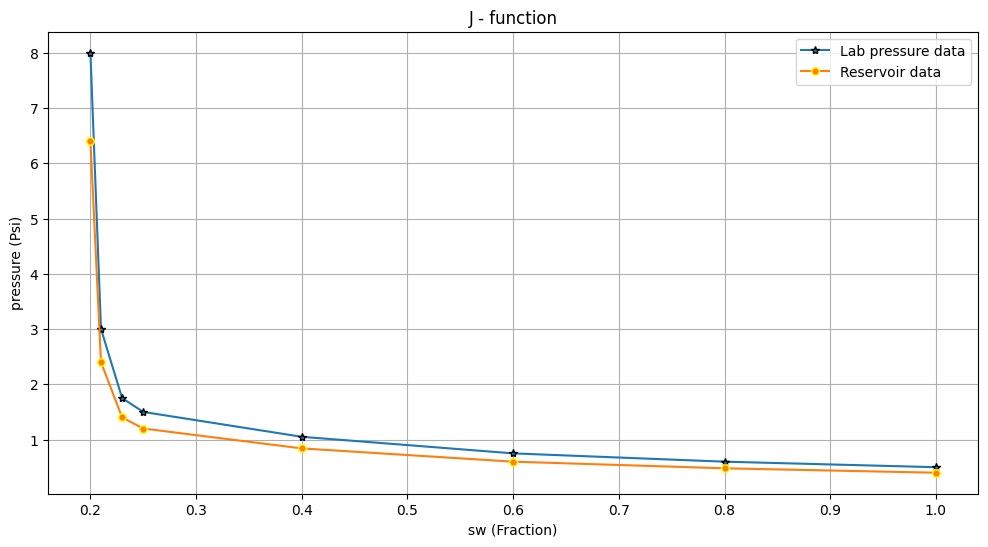

In [77]:
plt.style.use('default')

plt.figure(figsize=(12,6))

plt.plot(sw,Pc_lab,label="Lab pressure data",marker='*', mec='black')
plt.plot(sw,New_tbl['Reservoir_p'], label="Reservoir data", marker='H',mec='yellow')

plt.xlabel("sw (Fraction)")
plt.ylabel("pressure (Psi)")
plt.title("J - function")
plt.legend()
plt.grid()

plt.show()